In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('diabetes.csv')


In [3]:
df=df.drop(columns='family_histroy')

In [4]:
df['smoking'].value_counts()

smoking
3.000000    2534
4.860753     888
1.000000     745
2.000000     136
Name: count, dtype: int64

In [5]:
(df == 4.860753).sum()

Age           0
Gender        0
BMI           0
SBP           0
DBP           0
FPG           0
Chol         14
Tri          14
HDL         411
LDL         394
ALT           9
BUN          96
CCR          34
FFPG          0
smoking     888
drinking    888
Diabetes      0
dtype: int64

In [6]:
df.replace(4.860753, np.nan, inplace=True)
df.dropna(inplace=True)

In [8]:
df['smoking'].value_counts()

smoking
3.0    2429
1.0     698
2.0     133
Name: count, dtype: int64

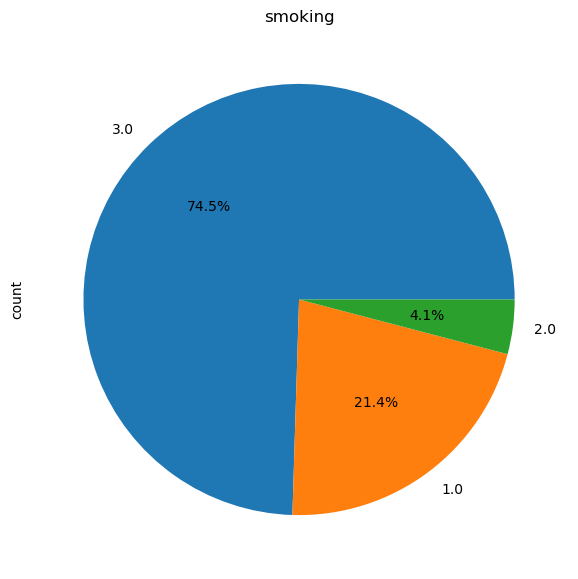

In [7]:
fig, axes = plt.subplots(figsize=(7, 7))
df['smoking'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df2p=df2.drop("id",axis=1)
summary = df.describe().loc[["min", "max"]].T
print(summary)
summary["range"] = summary["max"] - summary["min"]

plt.figure(figsize=(10, 6))
plt.barh(summary.index, summary["range"], left=summary["min"])
plt.xlabel("Value Range")
plt.title("Value Range of Each Column")
plt.tight_layout()
plt.show()

In [ ]:
df.plot.box(figsize=(12, 6), vert=False)
plt.title("Boxplot of Each Column")
plt.tight_layout()
plt.show()

In [ ]:
cols_to_exclude = ["Gender", "smoking", "drinking", "Diabetes"]
pca_data = df.drop(columns=cols_to_exclude)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                      c=df["smoking"], cmap="coolwarm", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Health Data")
plt.colorbar(scatter, label="smoking")
plt.tight_layout()
plt.show()